Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [605]:
from itertools import product
import numpy as np
from scipy import sparse
from random import random, choice, randint, seed
from functools import reduce
from copy import copy
import math
import matplotlib.pyplot as plt

In [606]:
num_points = [100, 1_000, 5_000]
num_sets = num_points
density = [.3, .7] 

In [607]:
def make_set_covering_problem(num_points, num_sets, density):
    """Returns a sparse array where rows are sets and columns are the covered items"""
    seed(num_points*2654435761+num_sets+density)
    sets = sparse.lil_array((num_sets, num_points), dtype=bool)
    for s, p in product(range(num_sets), range(num_points)):
        if random() < density:
            sets[s, p] = True
    for p in range(num_points):
        sets[randint(0, num_sets-1), p] = True
    return sets

# Halloween Challenge

Find the best solution with the fewest calls to the fitness functions for:

* `num_points = [100, 1_000, 5_000]`
* `num_sets = num_points`
* `density = [.3, .7]` 

In [608]:
SETS = make_set_covering_problem(num_points[0], num_sets[0], density[0])

# Hill-Climbing

In [609]:
def evaluate(state):
    cost = sum(state) 
    valid = np.all(
        reduce(
            np.logical_or,
            [SETS.getrow(i).toarray().flatten() for i, t in enumerate(state) if t],
            np.array([False for _ in range(num_points[0])]),
        )
    ) 
    return valid, -cost if valid else 0 

In [610]:
def tweak(state):
    new_state = copy(state)
    index = randint(0, num_sets[0] - 1)
    new_state[index] = not new_state[index]

    return new_state

In [611]:

current_state = [choice([True, False]) for _ in range(num_sets[0])]

for step in range(100):
    new_state = tweak(current_state)
    if evaluate(new_state) >= evaluate(current_state):
        current_state = new_state
        # print(current_state, evaluate(current_state))

print("Final state:", evaluate(current_state))

Final state: (True, -14)


# Simulated Annealing

In [612]:
def acceptance_probability(current_solution, tweaked_solution, temp):
    
    x = -abs(current_solution[1] - tweaked_solution[1]) / temp
    return math.exp(x)

Final state: (True, -19)


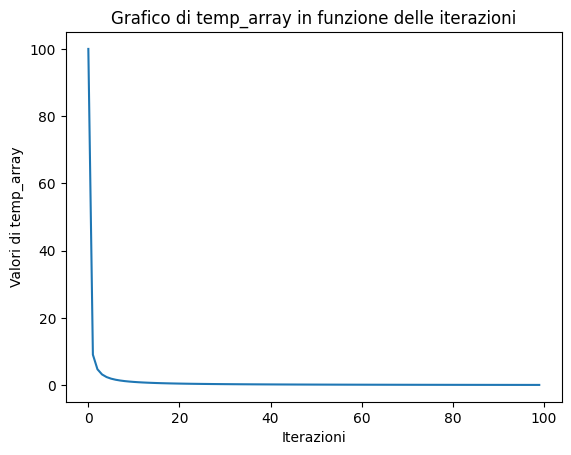

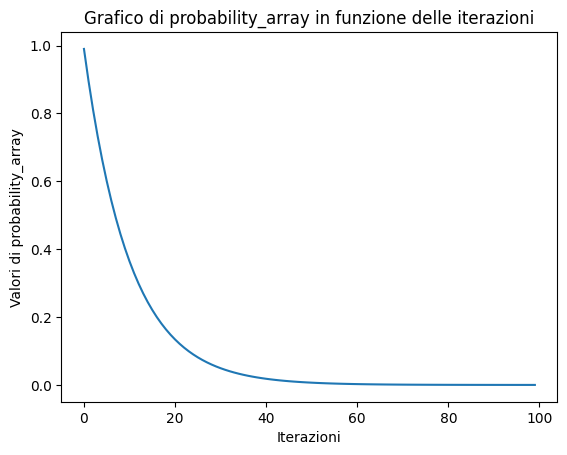

In [613]:
current_state = [choice([True, False]) for _ in range(num_sets[0])]

iterations = 100
temp_array = []
probability_array = []

for step in range(iterations):
    new_state = tweak(current_state)
    temp = iterations / (10*step + 1)
    temp_array.append(temp)
    p = acceptance_probability(evaluate(current_state), evaluate(new_state), temp)
    probability_array.append(p)
    
    if evaluate(new_state) >= evaluate(current_state) or random() < p:
        current_state = new_state
        # print(current_state, evaluate(current_state))

print("Final state:", evaluate(current_state))

plt.plot(range(iterations),temp_array)
plt.xlabel('Iterazioni')
plt.ylabel('Valori di temp_array')
plt.title('Grafico di temp_array in funzione delle iterazioni')
plt.show()

plt.plot(range(iterations),probability_array)
plt.xlabel('Iterazioni')
plt.ylabel('Valori di probability_array')
plt.title('Grafico di probability_array in funzione delle iterazioni')
plt.show()


